Computer Vision Course Work

In [1]:
#import package
from google.colab import drive
#mount my drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install opencv-python==4.4.0.46

     |████████████████████████████████| 49.5MB 94kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


In [ ]:
#import package
import os
#setup paths
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/Computer Vision/CW_Folder' 
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
#print content
print(os.listdir(GOOGLE_DRIVE_PATH))

['Code', 'CW_Dataset', 'Models', 'Videos']


In [ ]:
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE2 = 'Colab Notebooks/Computer Vision/CW_Folder/CW_Dataset' 
GOOGLE_DRIVE_PATH2 = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE2)
# Identify path to zipped dataset
zip_path = os.path.join(GOOGLE_DRIVE_PATH2, 'CW_Dataset.zip')
# Copy it to Colab
!cp '{zip_path}' .
# Unzip it
!yes|unzip -q CW_Dataset.zip
# Delete zipped version from Colab (not from Drive)
!rm CW_Dataset.zip

In [ ]:
#import packages
import cv2
from sklearn.model_selection import train_test_split
from skimage import img_as_ubyte, io, color
from sklearn.cluster import MiniBatchKMeans
from sklearn import svm, metrics
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
%matplotlib inline

In [ ]:
#setup train folder path
train_data = 'train'
#create empty list
images = []
#extract files
file_names = [file for file in sorted(os.listdir(os.path.join(train_data))) if file.endswith('.jpg')]
#append files to empty list
for file in file_names:
  images.append(io.imread(os.path.join(train_data, file)))

In [ ]:
#setup label folder path
train_labels = 'labels/list_label_train.txt'
#bring in file
labels = np.genfromtxt(train_labels)
#convert to list
labels = labels.tolist()
#extract second element in each list
labels = [item[1] for item in labels]

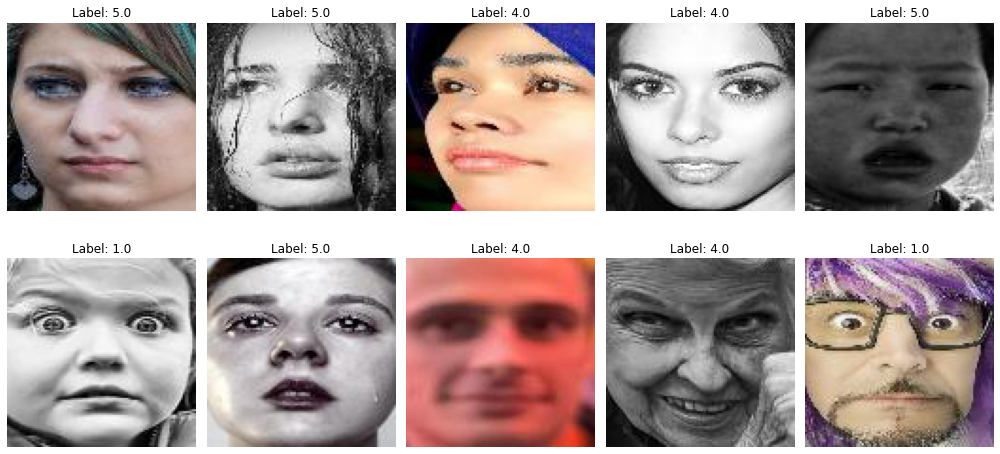

In [ ]:
#view first 10 images with their labels
fig, axes = plt.subplots(2, 5, figsize=(14, 7), sharex=True, sharey=True)
ax = axes.ravel()
for i in range(10):
    ax[i].imshow(images[i])
    ax[i].set_title(f'Label: {labels[i]}')
    ax[i].set_axis_off()
fig.tight_layout()
plt.show()

In [ ]:
print(Counter(labels))

Counter({4.0: 4772, 7.0: 2524, 5.0: 1982, 1.0: 1290, 3.0: 717, 6.0: 705, 2.0: 281})


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(
    images, labels, test_size=0.2, shuffle=True, stratify=labels)

# HOG - MLP

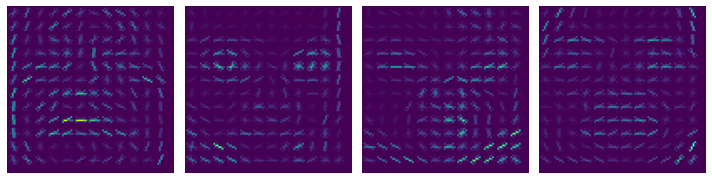

In [ ]:
from skimage.feature import hog
from skimage import data, exposure
import matplotlib.pyplot as plt

# Create empty lists for feature descriptors and labels
des_list = []
y_train_list = []

fig, ax = plt.subplots(1, 4, figsize=(10, 8), sharey=True)

for i in range(len(X_train)):
    # Extract descriptors with Hog
    HOG_des, HOG_image = hog(X_train[i], visualize=True, multichannel=True)
    HOG_image_rescaled = exposure.rescale_intensity(HOG_image)

    # Show results for first 4 images
    if i<4:
        ax[i].imshow(HOG_image_rescaled)
        ax[i].set_axis_off()

    # Append list of descriptors and label to respective lists
    if HOG_des is not None:
        des_list.append(HOG_des)
        y_train_list.append(y_train[i])

fig.tight_layout()
plt.show()

# Convert to array for easier handling
des_array = np.vstack(des_list)

In [ ]:
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np
from joblib import dump, load

In [ ]:
# Create a classifier: Multi-Layer Perceptron
classifier = MLPClassifier(hidden_layer_sizes=(25,), max_iter=100, alpha=1e-4,
                    solver='adam', verbose=True, random_state=1,
                    learning_rate_init=0.0001)

classifier.fit(des_list, y_train_list)

Iteration 1, loss = 1.60937487
Iteration 2, loss = 1.41093958
Iteration 3, loss = 1.28984668
Iteration 4, loss = 1.20434157
Iteration 5, loss = 1.14393274
Iteration 6, loss = 1.09341897
Iteration 7, loss = 1.04853919
Iteration 8, loss = 1.01254693
Iteration 9, loss = 0.98173790
Iteration 10, loss = 0.95607972
Iteration 11, loss = 0.93421512
Iteration 12, loss = 0.91339582
Iteration 13, loss = 0.89681387
Iteration 14, loss = 0.87943014
Iteration 15, loss = 0.86475331
Iteration 16, loss = 0.85144810
Iteration 17, loss = 0.84083713
Iteration 18, loss = 0.82781790
Iteration 19, loss = 0.81742987
Iteration 20, loss = 0.80671834
Iteration 21, loss = 0.79723112
Iteration 22, loss = 0.78986635
Iteration 23, loss = 0.78012302
Iteration 24, loss = 0.77183495
Iteration 25, loss = 0.76407417
Iteration 26, loss = 0.75804847
Iteration 27, loss = 0.75021860
Iteration 28, loss = 0.74442262
Iteration 29, loss = 0.73978357
Iteration 30, loss = 0.73266139
Iteration 31, loss = 0.72616792
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(25,), learning_rate='constant',
              learning_rate_init=0.0001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [ ]:
import joblib
filename = '/content/drive/My Drive/Colab Notebooks/Computer Vision/CW_Folder/Models/MLP.sav'
joblib.dump(classifier, filename)



['/content/drive/My Drive/Colab Notebooks/Computer Vision/CW_Folder/Models/MLP.sav']

In [ ]:
# Create empty lists for feature descriptors and labels
des_list = []
y_valid_list = []

for i in range(len(X_valid)):
    # Extract descriptors with Hog
    HOG_des, HOG_image = hog(X_valid[i], visualize=True, multichannel=True)
    HOG_image_rescaled = exposure.rescale_intensity(HOG_image)

    # Append list of descriptors and label to respective lists
    if HOG_des is not None:
        des_list.append(HOG_des)
        y_valid_list.append(y_valid[i])

# Convert to array for easier handling
des_array = np.vstack(des_list)

In [ ]:
predicted = classifier.predict(des_array)

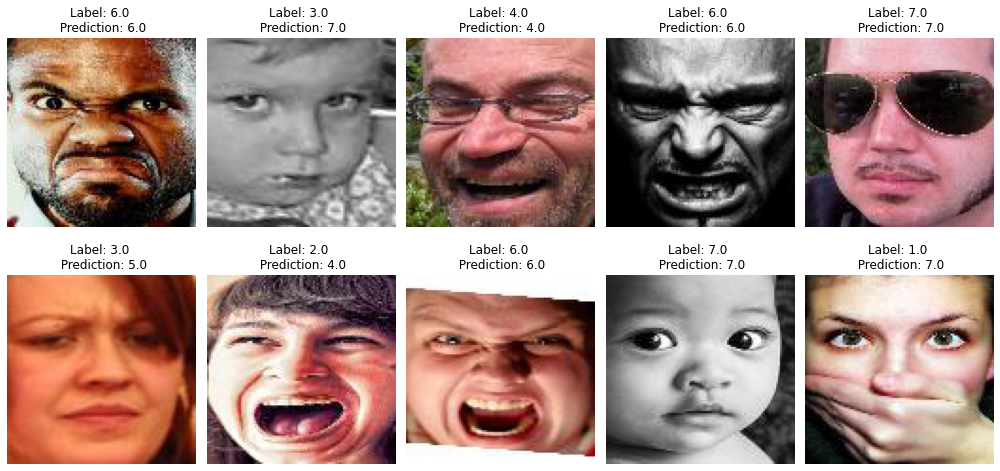

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(14, 7), sharex=True, sharey=True)
ax = axes.ravel()

for i in range(10):
    ax[i].imshow(X_valid[i])
    ax[i].set_title(f'Label: {y_valid_list[i]} \n Prediction: {predicted[i]}')
    ax[i].set_axis_off()
fig.tight_layout()
plt.show()

In [ ]:
print(f"""Classification report for classifier {classifier}:\n
      {metrics.classification_report(y_valid_list, predicted)}""")

Classification report for classifier MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(25,), learning_rate='constant',
              learning_rate_init=0.0001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False):

                    precision    recall  f1-score   support

         1.0       0.71      0.69      0.70       258
         2.0       0.70      0.34      0.46        56
         3.0       0.43      0.29      0.35       143
         4.0       0.84      0.88      0.86       955
         5.0       0.62      0.54      0.58       397
         6.0       0.64      0.59      0.61       141
         7.0       0.60      0.71      0.65       505


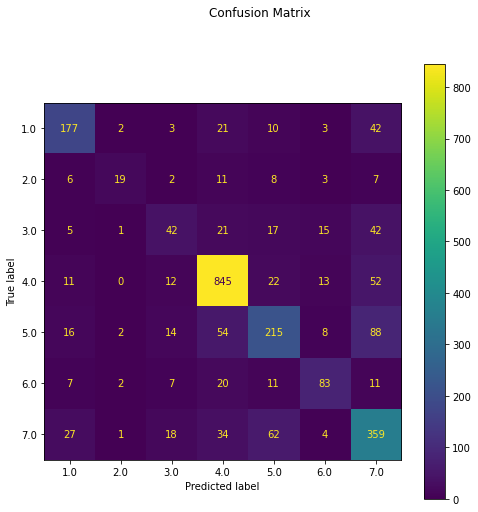

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
disp = metrics.plot_confusion_matrix(classifier, des_array, y_valid_list,
                                     values_format = 'd', ax=ax)
disp.figure_.suptitle("Confusion Matrix")
plt.show()